In [4]:
import sys, os, re, jax
sys.path.append(os.path.abspath("./../../feedback-grape"))
sys.path.append(os.path.abspath("./../../"))
sys.path.append(os.path.abspath("./../"))

from matplotlib import pyplot as plt
import numpy as np

from plot_helpers import (
    open_from_dir,
    plot_runs,
    plot_runs_1D,
    plot_grid,
    grid_grouped_params,
    select_best_runs,
    extract_time_constants,
)

In [ ]:
dir_ = "./04_results"

#gamma_p, gamma_m = 0.0003511191734215131, 0.02848035868435799 # Only system where oscillations are the best performing model and slightly better than stabilizer

exclude = rf"^(?!.*gammap={gamma_p}_gammam={gamma_m}).*$"

fidelities_mat, params_grouped, params_each = open_from_dir(dir_ + "/eval", exclude=exclude)
fidelities_best_mat, params_grouped_best, params_each_best = select_best_runs(fidelities_mat, params_each)

fidelities_mat_stab, params_grouped_stab, params_each_stab = open_from_dir(dir_ + "/custom/Stabilizer code", exclude=exclude)
fidelities_mat_base, params_grouped_base, params_each_base = open_from_dir(dir_ + "/baseline", exclude=exclude)

Opening files...


100%|██████████| 732/732 [00:00<00:00, 114377.32it/s]


Done.
Opening files...


100%|██████████| 144/144 [00:00<00:00, 63157.98it/s]


Done.
Opening files...


100%|██████████| 144/144 [00:00<00:00, 24712.76it/s]

Done.
[{'t': 3, 'l': 2, 'w': [1, 1, 1], 'Nqubits': 3, 'Nmeas': 2, 'gammap': 0.0003511191734215131, 'gammam': 0.02848035868435799, 'rhot': 'bloch', 'rhoe': 'bloch', 's': 0}, {'t': 3, 'l': 2, 'w': [1, 1, 1], 'Nqubits': 3, 'Nmeas': 2, 'gammap': 0.0003511191734215131, 'gammam': 0.02848035868435799, 'rhot': 'bloch', 'rhoe': 'bloch', 's': 1}, {'t': 3, 'l': 2, 'w': [1, 1, 1], 'Nqubits': 3, 'Nmeas': 2, 'gammap': 0.0003511191734215131, 'gammam': 0.02848035868435799, 'rhot': 'bloch', 'rhoe': 'bloch', 's': 2}, {'t': 3, 'l': 2, 'w': [1, 1, 1], 'Nqubits': 3, 'Nmeas': 2, 'gammap': 0.0003511191734215131, 'gammam': 0.02848035868435799, 'rhot': 'bloch', 'rhoe': 'bloch', 's': 3}, {'t': 3, 'l': 2, 'w': [1, 1, 1], 'Nqubits': 3, 'Nmeas': 2, 'gammap': 0.0003511191734215131, 'gammam': 0.02848035868435799, 'rhot': 'bloch', 'rhoe': 'bloch', 's': 4}]
[{'t': 3, 'l': 2, 'w': [1, 1, 1], 'Nqubits': 3, 'Nmeas': 2, 'gammap': 0.0003511191734215131, 'gammam': 0.02848035868435799, 'rhot': 'bloch', 'rhoe': 'bloc'}]
[{'t'

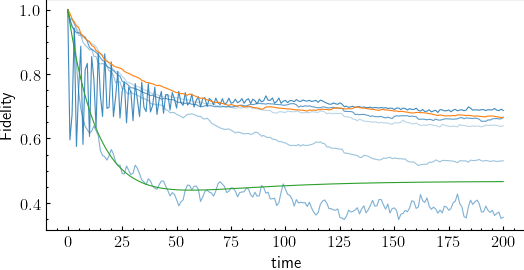

In [6]:
fig, ax = plt.subplots(figsize=(6.1811,3))
ax.set_xlabel("time")
ax.set_ylabel("Fidelity")

for i, (fidelities, p) in enumerate(zip(fidelities_mat, params_each)):
    ax.plot(fidelities, label=f"Model s={p['s']}", color="C0", alpha=0.3 + 0.7 * (i / len(fidelities_mat)))

ax.plot(fidelities_mat_stab[0], label="Stabilizer code", color="C1")
ax.plot(fidelities_mat_base[0], label="Baseline", color="C2")
#ax.legend(loc="lower left")